In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
from pathlib import Path
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model

In [3]:
path = Path('../input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset')
file_path = list(path.glob(r'**/*.png'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))

In [4]:
file_path = pd.Series(file_path).astype(str)
labels = pd.Series(labels)

df = pd.concat([file_path, labels], axis=1)

df.columns = ['image', 'label']

df.head()

,image,label
0,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
1,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
2,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
3,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
4,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel


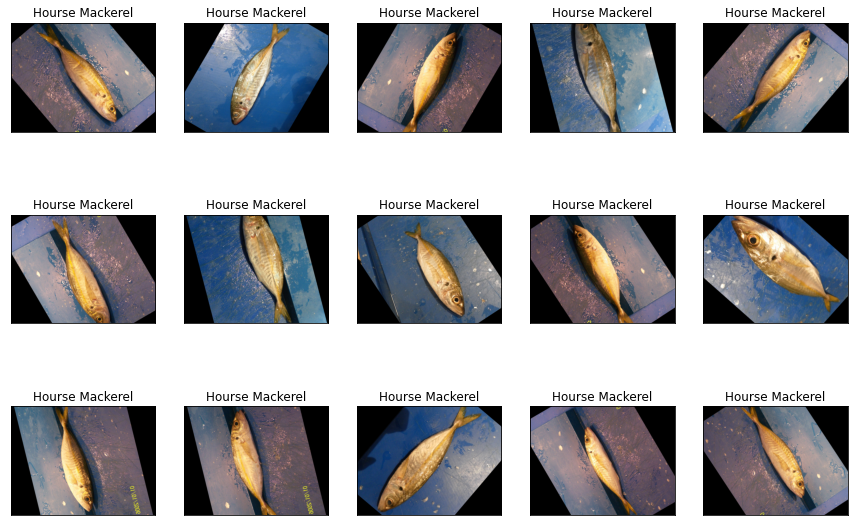

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10), subplot_kw={'xticks': [], 'yticks': []})

for ax in axes.flat:
    y = np.random.randint(1000)
    ax.imshow(plt.imread(df.image[y]))
    ax.set_title(df.label[y])
    
plt.show()

In [6]:
df.label.value_counts()

Trout GT                 1000
Sea Bass GT              1000
Sea Bass                 1000
Striped Red Mullet       1000
Red Mullet               1000
Hourse Mackerel GT       1000
Gilt-Head Bream          1000
Trout                    1000
Gilt-Head Bream GT       1000
Red Mullet GT            1000
Red Sea Bream            1000
Striped Red Mullet GT    1000
Red Sea Bream GT         1000
Shrimp                   1000
Black Sea Sprat          1000
Shrimp GT                1000
Black Sea Sprat GT       1000
Hourse Mackerel          1000
Name: label, dtype: int64

In [7]:
df = df[df['label'].apply(lambda x: x[-2:] != 'GT')].reset_index(drop=True)
df.label.value_counts()

Red Sea Bream         1000
Trout                 1000
Black Sea Sprat       1000
Gilt-Head Bream       1000
Red Mullet            1000
Shrimp                1000
Striped Red Mullet    1000
Sea Bass              1000
Hourse Mackerel       1000
Name: label, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test = train_test_split(df, test_size=.3, random_state=30)
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=30)

In [10]:
print('Shape of Train data is ', x_train.shape)
print('Shape of Test data is ', x_test.shape)
print('Shape of Validation data is ', x_val.shape)

Shape of Train data is  (5040, 2)
Shape of Test data is  (2700, 2)
Shape of Validation data is  (1260, 2)


In [11]:
train_gen =  ImageDataGenerator(rescale=1./255,
                               rotation_range=40,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest')

val_gen = ImageDataGenerator(rescale=1./225)

test_gen = ImageDataGenerator(rescale=1./225)

In [12]:
train_data = train_gen.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', 
                                           target_size=(227, 227), color_mode='rgb', class_mode='categorical', shuffle=True)

val_data = val_gen.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', 
                                           target_size=(227, 227), color_mode='rgb', class_mode='categorical', shuffle=True)
test_data = test_gen.flow_from_dataframe(dataframe=x_test, x_col='image', y_col='label', 
                                           target_size=(227, 227), color_mode='rgb', class_mode='categorical', shuffle=True)

Found 5040 validated image filenames belonging to 9 classes.
Found 1260 validated image filenames belonging to 9 classes.
Found 2700 validated image filenames belonging to 9 classes.


In [13]:
print("Batch size for Input image: ", train_data[0][0].shape)
print("Batch size for Output image: ", train_data[0][1].shape)
print("Image size of the first image: ", train_data[0][0][0].shape)
print('Output of the first image: ', train_data[0][0][1].shape)

Batch size for Input image:  (32, 227, 227, 3)
Batch size for Output image:  (32, 9)
Image size of the first image:  (227, 227, 3)
Output of the first image:  (227, 227, 3)


/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 0. 1. 0. 0. 0. 0. 0.]')

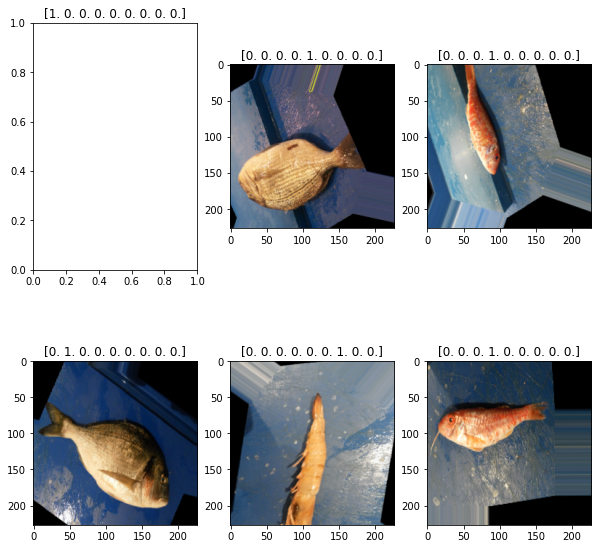

In [14]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].set_title(train_data[0][1][12])
axs[0][1].imshow(train_data[0][0][10])
axs[0][1].set_title(train_data[0][1][10])
axs[0][2].imshow(train_data[0][0][5])
axs[0][2].set_title(train_data[0][1][5])
axs[1][0].imshow(train_data[0][0][20])
axs[1][0].set_title(train_data[0][1][20])
axs[1][1].imshow(train_data[0][0][25])
axs[1][1].set_title(train_data[0][1][25])
axs[1][2].imshow(train_data[0][0][3])
axs[1][2].set_title(train_data[0][1][3])

In [15]:
from keras import layers

In [16]:
def AlexNet(input_shape):
    
    x_input = keras.layers.Input(input_shape)
    
    x = layers.Conv2D(96, (11, 11), strides=4, name='conv0')(x_input)
    x = layers.BatchNormalization(axis=3, name='bn0')(x)
    x = layers.Activation('relu')(x)
    
    x = layers.MaxPooling2D((3, 3), strides=2, name='max0')(x)
    
    x = layers.Conv2D(256, (5, 5), strides=2, padding='same', name='conv1')(x)
    x = layers.BatchNormalization(axis=3, name='bn1')(x)
    x = layers.Activation('relu')(x)
    
    x = layers.MaxPooling2D((3, 3), strides=2, name='max1')(x)
    
    x = layers.Conv2D(384, (3, 3), padding='same', name='conv2')(x)
    x = layers.BatchNormalization(axis=3, name='bn2')(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(384, (3, 3), padding='same', name='conv3')(x)
    x = layers.BatchNormalization(axis=3, name='bn3')(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(256, (3, 3), padding='same', name='conv4')(x)
    x = layers.BatchNormalization(axis=3, name='bn4')(x)
    x = layers.Activation('relu')(x)
    
    x = layers.MaxPooling2D((3, 3), strides=2, name='max2')(x)
    
    x = layers.Flatten()(x)
    
    x = layers.Dense(4096, activation='relu', name='fc0')(x)
    
    x = layers.Dense(4096, activation='relu', name='fc1')(x)
    
    x = layers.Dense(9, activation='softmax')(x)
    
    model = keras.Model(inputs=x_input, outputs=x, name='AlexNet')
    
    return model

In [17]:
alex = AlexNet(train_data[0][0].shape[1:])
alex.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)
alex.summary()

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv0 (Conv2D)               (None, 55, 55, 96)        34944     
_________________________________________________________________
bn0 (BatchNormalization)     (None, 55, 55, 96)        384       
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max0 (MaxPooling2D)          (None, 27, 27, 96)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 14, 14, 256)       614656    
_________________________________________________________________
bn1 (BatchNormalization)     (None, 14, 14, 256)       1024

In [18]:
history = alex.fit(train_data, epochs=10, validation_data=val_data, callbacks=callbacks)

Epoch 1/10
158/158 [==============================] - 195s 1s/step - loss: 3.4330 - accuracy: 0.2309 - val_loss: 4.0545 - val_accuracy: 0.1413
Epoch 2/10
158/158 [==============================] - 108s 683ms/step - loss: 1.1919 - accuracy: 0.5473 - val_loss: 10.2843 - val_accuracy: 0.2190
Epoch 3/10
158/158 [==============================] - 108s 686ms/step - loss: 0.9151 - accuracy: 0.6588 - val_loss: 3.0340 - val_accuracy: 0.3452
Epoch 4/10
158/158 [==============================] - 108s 684ms/step - loss: 0.6243 - accuracy: 0.7772 - val_loss: 3.5117 - val_accuracy: 0.2500
Epoch 5/10
158/158 [==============================] - 108s 685ms/step - loss: 0.5046 - accuracy: 0.8214 - val_loss: 6.2400 - val_accuracy: 0.2516
Epoch 6/10
158/158 [==============================] - 108s 686ms/step - loss: 0.3950 - accuracy: 0.8745 - val_loss: 5.3518 - val_accuracy: 0.2619
Epoch 7/10
158/158 [==============================] - 109s 690ms/step - loss: 0.3689 - accuracy: 0.8768 - val_loss: 10.7457 - 

In [19]:
alex.save('alex-net.h5')

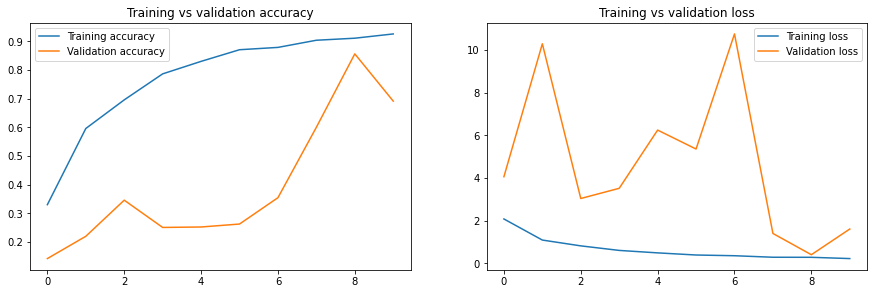

In [20]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [21]:
test_accuracy = alex.evaluate(test_data)[1]

85/85 [==============================] - 57s 674ms/step - loss: 1.8091 - accuracy: 0.6719
